In [51]:
import os
import re
import glob
import numpy as np
import GPX_functions
import rasterio
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import cartopy
import cartopy.crs as ccrs
import hikinggc
import logging
from matplotlib.font_manager import FontProperties
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)

In [4]:
datadir = "/data/GPX/Garmin/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "*.gpx")))

['/data/GPX/Garmin/2022-08-27-22-40-35.gpx',
 '/data/GPX/Garmin/2022-08-28-07-58-33.gpx',
 '/data/GPX/Garmin/2022-08-29-06-50-51.gpx',
 '/data/GPX/Garmin/2022-08-29-12-00-28.gpx',
 '/data/GPX/Garmin/2022-08-29-15-31-19.gpx',
 '/data/GPX/Garmin/2022-08-30-07-02-01.gpx',
 '/data/GPX/Garmin/2022-08-30-09-20-56.gpx',
 '/data/GPX/Garmin/2022-08-30-12-06-09.gpx',
 '/data/GPX/Garmin/2022-08-30-15-08-54.gpx',
 '/data/GPX/Garmin/2022-08-31-07-06-19.gpx',
 '/data/GPX/Garmin/2022-08-31-11-02-22.gpx',
 '/data/GPX/Garmin/2022-08-31-19-44-04.gpx',
 '/data/GPX/Garmin/2022-09-01-12-05-39.gpx',
 '/data/GPX/Garmin/2022-09-02-06-56-43.gpx',
 '/data/GPX/Garmin/2022-09-02-08-54-24.gpx',
 '/data/GPX/Garmin/2022-09-02-13-35-19.gpx',
 '/data/GPX/Garmin/2022-09-03-15-08-20.gpx',
 '/data/GPX/Garmin/2022-09-03-20-55-21.gpx',
 '/data/GPX/Garmin/2022-09-04-07-36-21.gpx',
 '/data/GPX/Garmin/2022-09-05-09-58-25.gpx',
 '/data/GPX/Garmin/2022-09-05-17-18-13.gpx',
 '/data/GPX/Garmin/2022-09-05-18-00-16.gpx',
 '/data/GP

In [63]:
datelist = []
distancelist = []
duration = []

dateinit = datetime.date(2000, 1, 1)
distanceday = 0.
durationday = 0.
for df in datafilelist:
    track = hikinggc.Track()
    track.get_coords(df)
    track.compute_dist()
    
    if len(track.time):
        
        datestart = track.time[0]
        year = datestart.year
        month = datestart.month
        day = datestart.day
        thedate = datetime.date(year, month, day)
            
        if thedate == datetime.date(2022, 10, 23):
            break
        else:
            
            if thedate == dateinit:
                # Need to add the distance and duration
                distanceday += track.dist[-1]
                durationday += (track.time[-1] - track.time[0]).seconds
            else:
                # days are different: write in list and reset values
                datelist.append(thedate)
                distancelist.append(distanceday)
                duration.append(durationday)

                dateinit = thedate
                distanceday = track.dist[-1]
                durationday = (track.time[-1] - track.time[0]).seconds

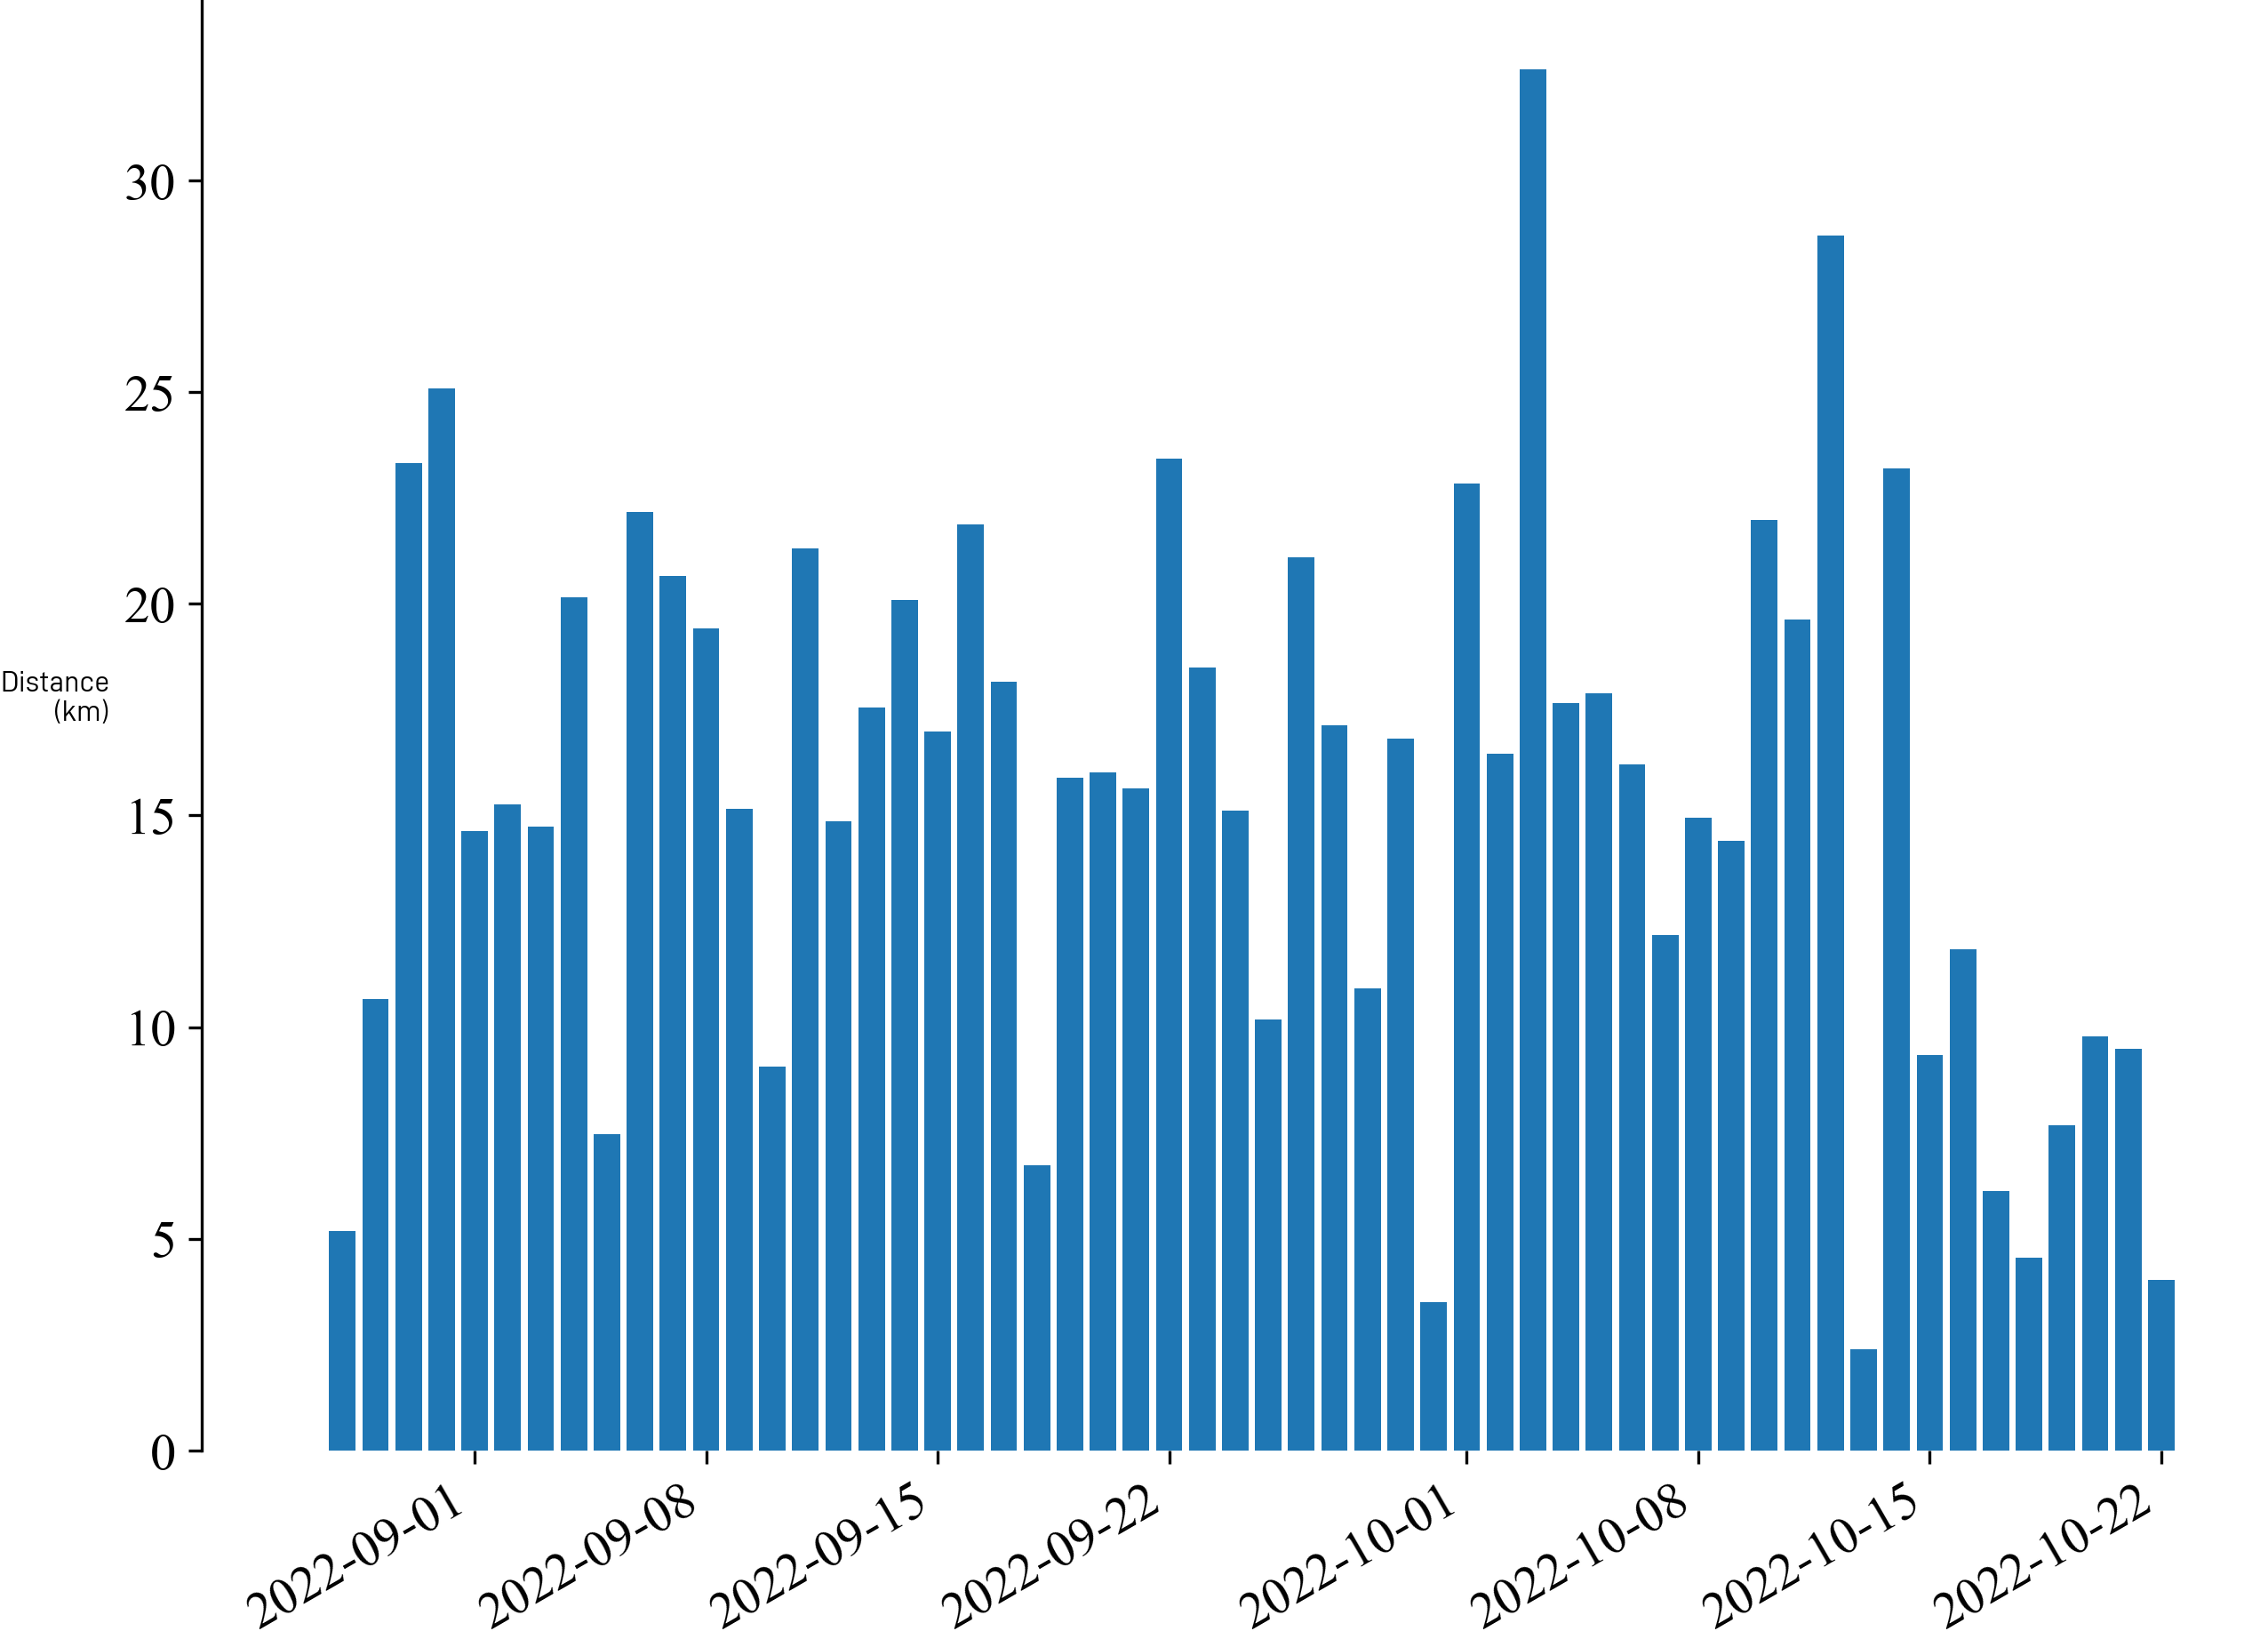

In [64]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(datelist, distancelist)
ax.set_ylabel("Distance\n(km)", rotation=0, ha="right", fontproperties=myfont)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.autofmt_xdate()

In [57]:
np.where(np.array(datelist) == datetime.date(2022, 10, 22))

(array([56]),)

In [59]:
distancelist[56]

0.0